<a href="https://colab.research.google.com/github/jitendra19/stock-market-prediction/blob/main/stock_market_prediction_using_ML_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

In [2]:
!pip install pmdarima

In [3]:
!pip install statsmodels

In [4]:
# Import Python Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('whitegrid')

plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
# from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [5]:
stockName = 'AAPL'
periodOfData = "5y"

# df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
ticker = yf.Ticker(stockName)
df = ticker.history(period=periodOfData, auto_adjust=True)

# Show the data
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-06,164.289993,167.879898,164.279999,165.320007,107496982,0.0,0.0
2021-12-07,169.080002,171.580002,168.339996,171.179993,120405352,0.0,0.0
2021-12-08,172.125000,175.960007,170.699997,175.080002,116998901,0.0,0.0
2021-12-09,174.910004,176.750000,173.919998,174.559998,108157647,0.0,0.0
2021-12-10,175.205002,179.630005,174.690002,179.449997,110986702,0.0,0.0


In [6]:
close_df = df[['Close']]
close_df[['Close']].tail()

,Close
Date,
2021-12-06,165.320007
2021-12-07,171.179993
2021-12-08,175.080002
2021-12-09,174.559998
2021-12-10,179.449997


In [7]:
# lets create one more column which is having stock values 15 days in advance, by shifting 15 rows up.
# create Machine learning LR model based on the current and 15 days later values and predict the values 15 days in advance.
close_df['Prediction'] = close_df[['Close']].shift(-15)
#print data set

print('first 15 rows --- ',close_df[0:15])
print('last 15 rows --- ',close_df[-15:])

first 15 rows ---                   Close  Prediction
Date                              
2016-12-12  110.569824  113.224281
2016-12-13  112.414314  113.800064
2016-12-14  112.414314  115.068748
2016-12-15  113.029114  116.122719
2016-12-16  113.175491  116.239845
2016-12-19  113.829376  116.864403
2016-12-20  114.131866  116.376450
2016-12-21  114.239220  116.171516
2016-12-22  113.487778  117.108368
2016-12-23  113.712257  117.098618
2016-12-27  114.434395  116.893677
2016-12-28  113.946449  117.108368
2016-12-29  113.917191  117.186455
2016-12-30  113.029114  117.079109
2017-01-03  113.351173  118.943069
last 15 rows ---                   Close  Prediction
Date                              
2021-11-19  160.550003         NaN
2021-11-22  161.020004         NaN
2021-11-23  161.410004         NaN
2021-11-24  161.940002         NaN
2021-11-26  156.809998         NaN
2021-11-29  160.240005         NaN
2021-11-30  165.300003         NaN
2021-12-01  164.770004         NaN
2021-12-02  163.75

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
print('last 15 rows --- ',close_df[-15:])
print('wihtout last 15 rows --- ',close_df[:-15])

last 15 rows ---                   Close  Prediction
Date                              
2021-11-19  160.550003         NaN
2021-11-22  161.020004         NaN
2021-11-23  161.410004         NaN
2021-11-24  161.940002         NaN
2021-11-26  156.809998         NaN
2021-11-29  160.240005         NaN
2021-11-30  165.300003         NaN
2021-12-01  164.770004         NaN
2021-12-02  163.759995         NaN
2021-12-03  161.839996         NaN
2021-12-06  165.320007         NaN
2021-12-07  171.179993         NaN
2021-12-08  175.080002         NaN
2021-12-09  174.559998         NaN
2021-12-10  179.449997         NaN
wihtout last 15 rows ---                   Close  Prediction
Date                              
2016-12-12  110.569824  113.224281
2016-12-13  112.414314  113.800064
2016-12-14  112.414314  115.068748
2016-12-15  113.029114  116.122719
2016-12-16  113.175491  116.239845
...                ...         ...
2021-11-12  149.990005  165.320007
2021-11-15  150.000000  171.179993
2021-11-16 

In [9]:
#Create a new data set 'xclose_df' and convert it into numpy array , which will be having actual values
xclose_df = np.array(close_df.drop(['Prediction'],1))
#Remove the last 15 rows
xclose_df = xclose_df[:-15]
print(xclose_df)

[[110.56982422]
 [112.41431427]
 [112.41431427]
 ...
 [151.        ]
 [153.49000549]
 [157.86999512]]


In [10]:
# Create a dataset 'yclose_df' which will be having Predicted values and convert into numpy array
yclose_df = np.array(close_df['Prediction'])
# Remove Last 15 rows
yclose_df = yclose_df[:-15]
print(yclose_df)

[113.22428131 113.80006409 115.06874847 ... 175.08000183 174.55999756
 179.44999695]


In [11]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR


# Split the data into train and test with 90 & 10 % respectively
x_train, x_test, y_train, y_test = train_test_split(xclose_df, yclose_df, test_size=0.1)

# using SVM

In [12]:
# SVM Model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1) # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default='rbf'
# Train the model 
svr.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [13]:
# The best possible score is 1.0
svm_confidence = svr.score(x_test, y_test)
print('svm confidence: ', svm_confidence)

svm confidence:  0.9424707543105982


In [14]:
# get the last 15 rows of the original data set from Close column and convert into numpy array
forecast = np.array(close_df.drop(['Prediction'],1))[-15:]
print(forecast)

[[160.55000305]
 [161.02000427]
 [161.41000366]
 [161.94000244]
 [156.80999756]
 [160.24000549]
 [165.30000305]
 [164.77000427]
 [163.75999451]
 [161.83999634]
 [165.32000732]
 [171.17999268]
 [175.08000183]
 [174.55999756]
 [179.44999695]]


In [15]:
# support vector model predictions for the next ‘15’ days
svm_prediction = svr.predict(forecast)

for i in range(15):
    print(forecast[i][0], ' ---> ',svm_prediction[i])

# print(svm_prediction)
# print(forecast)

160.5500030517578  --->  167.379656498987
161.02000427246094  --->  170.9941499795067
161.41000366210938  --->  172.31696581791962
161.94000244140625  --->  172.07725542993245
156.80999755859375  --->  159.82979641004633
160.24000549316406  --->  164.04061842990606
165.3000030517578  --->  168.3861656774226
164.77000427246094  --->  168.98310330426327
163.75999450683594  --->  169.27244660783478
161.83999633789062  --->  172.25176432279636
165.32000732421875  --->  168.3623628884305
171.17999267578125  --->  170.3770085054903
175.0800018310547  --->  169.2087357448768
174.55999755859375  --->  167.63633920402373
179.4499969482422  --->  192.3306254808778


In [16]:
from prettytable import PrettyTable

myTable = PrettyTable(["closing price", "Prediction"]) 

for i in range(15):
    # print(forecast[i][0], ' ---> ',svm_prediction[i])
    myTable.add_row([forecast[i][0], svm_prediction[i]])

print(myTable)

+--------------------+--------------------+
|   closing price    |     Prediction     |
+--------------------+--------------------+
| 160.5500030517578  |  167.379656498987  |
| 161.02000427246094 | 170.9941499795067  |
| 161.41000366210938 | 172.31696581791962 |
| 161.94000244140625 | 172.07725542993245 |
| 156.80999755859375 | 159.82979641004633 |
| 160.24000549316406 | 164.04061842990606 |
| 165.3000030517578  | 168.3861656774226  |
| 164.77000427246094 | 168.98310330426327 |
| 163.75999450683594 | 169.27244660783478 |
| 161.83999633789062 | 172.25176432279636 |
| 165.32000732421875 | 168.3623628884305  |
| 171.17999267578125 | 170.3770085054903  |
| 175.0800018310547  | 169.2087357448768  |
| 174.55999755859375 | 167.63633920402373 |
| 179.4499969482422  | 192.3306254808778  |
+--------------------+--------------------+


# Using Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# Linear Regression Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
# Testing Model: Return the coefficient of determination R² of the prediction.

# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print(lr_confidence)

0.7331486046817897


In [20]:
# get the last 15 rows of the original data set from Adj. Close column and convert into numpy array

forecast = np.array(close_df.drop(['Prediction'],1))[-15:]
print(forecast)

[[160.55000305]
 [161.02000427]
 [161.41000366]
 [161.94000244]
 [156.80999756]
 [160.24000549]
 [165.30000305]
 [164.77000427]
 [163.75999451]
 [161.83999634]
 [165.32000732]
 [171.17999268]
 [175.08000183]
 [174.55999756]
 [179.44999695]]


In [21]:
# linear regression model predictions for the next 15 days
lr_prediction = lr.predict(forecast)
print(lr_prediction)

[161.15589521 161.54140742 161.86129919 162.29602359 158.0882058
 160.90162387 165.05201909 164.61729469 163.78884771 162.21399493
 165.06842733 169.87500183 173.0739321  172.64740556 176.65836206]


In [22]:
from prettytable import PrettyTable

myTable = PrettyTable(["closing price", "Prediction"]) 

for i in range(15):
    myTable.add_row([forecast[i][0], lr_prediction[i]])

print(myTable)

+--------------------+--------------------+
|   closing price    |     Prediction     |
+--------------------+--------------------+
| 160.5500030517578  | 161.15589521206323 |
| 161.02000427246094 | 161.54140741824583 |
| 161.41000366210938 | 161.86129919403376 |
| 161.94000244140625 | 162.29602359405797 |
| 156.80999755859375 | 158.08820579915567 |
| 160.24000549316406 | 160.90162386666992 |
| 165.3000030517578  | 165.0520190915454  |
| 164.77000427246094 | 164.6172946915212  |
| 163.75999450683594 | 163.78884770912924 |
| 161.83999633789062 | 162.21399492711035 |
| 165.32000732421875 | 165.06842732809838 |
| 171.17999267578125 | 169.8750018252854  |
| 175.0800018310547  | 173.07393209898223 |
| 174.55999755859375 | 172.64740555932585 |
| 179.4499969482422  | 176.65836206304425 |
+--------------------+--------------------+


## Arima

In [23]:
!pip install statsmodels




In [36]:
import os
import warnings
# from pmdarima.arima import auto_arima


warnings.filterwarnings('ignore')


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pandas.util._decorators import Appender


from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [37]:
# dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-06,164.289993,167.879898,164.279999,165.320007,107496982,0.0,0.0
2021-12-07,169.080002,171.580002,168.339996,171.179993,120405352,0.0,0.0
2021-12-08,172.125000,175.960007,170.699997,175.080002,116998901,0.0,0.0
2021-12-09,174.910004,176.750000,173.919998,174.559998,108157647,0.0,0.0
2021-12-10,175.205002,179.630005,174.690002,179.449997,110986702,0.0,0.0


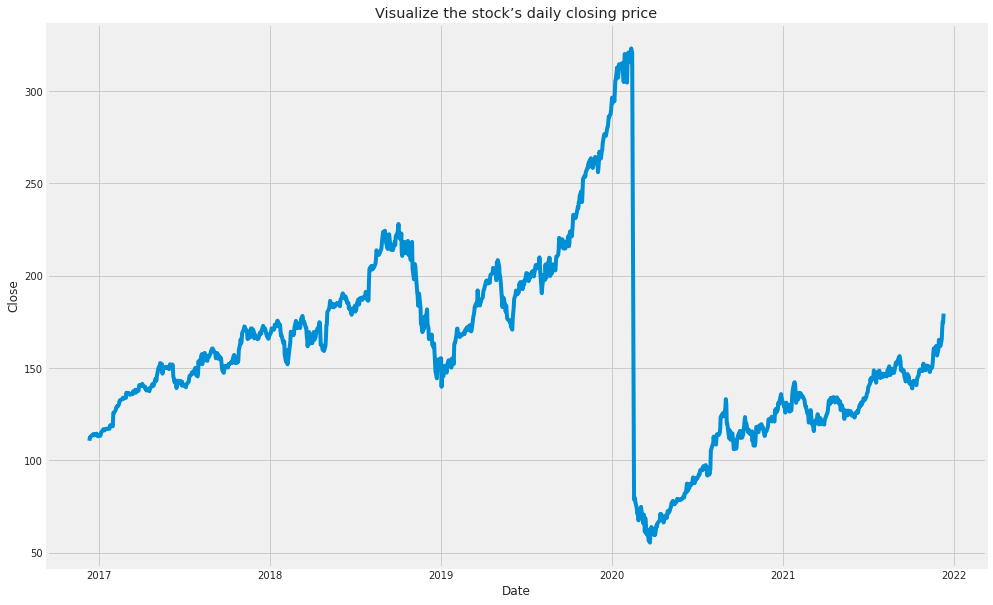

In [38]:
# Visualize the stock’s daily closing price.

#plot close price
plt.figure(figsize=(15,10))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(df['Close'])
plt.title('Visualize the stock’s daily closing price')
plt.show()



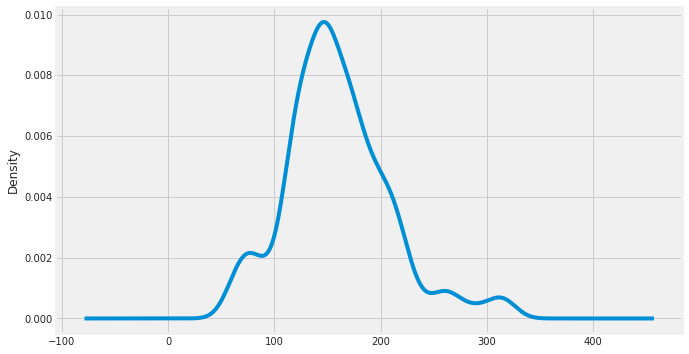

In [39]:
#Distribution of the dataset
df_close = df['Close']
df_close.plot(kind='kde')


time series analysis only works with stationary data, we must first determine whether a series is stationary.

ADF (Augmented Dickey-Fuller) Test



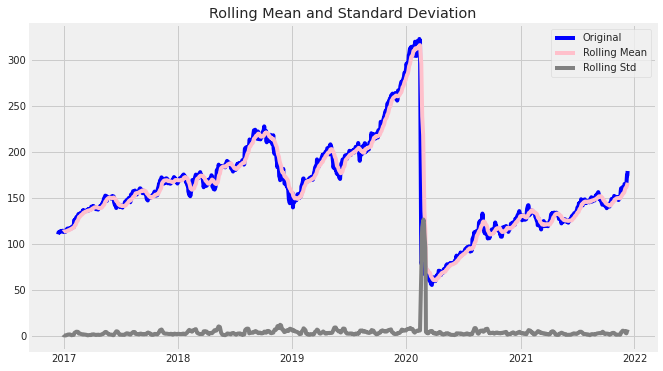

Results of dickey fuller test
Test Statistics                  -2.736391
p-value                           0.067950
No. of lags used                  0.000000
Number of observations used    1258.000000
critical value (1%)              -3.435559
critical value (5%)              -2.863840
critical value (10%)             -2.567995
dtype: float64


In [40]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='pink', label='Rolling Mean')
    plt.plot(rolstd, color='grey', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

The increasing mean and standard deviation may be seen in the graph above, indicating that our series isn’t stationary.

We can’t rule out the Null hypothesis because the p-value is bigger than 0.05. Additionally, the test statistics exceed the critical values. As a result, the data is nonlinear.

Seasonality and trend may need to be separated from our series before we can undertake a time series analysis. This approach will cause the resulting series to become stagnant.

Let’s isolate the time series from the Trend and Seasonality.

<Figure size 720x432 with 0 Axes>

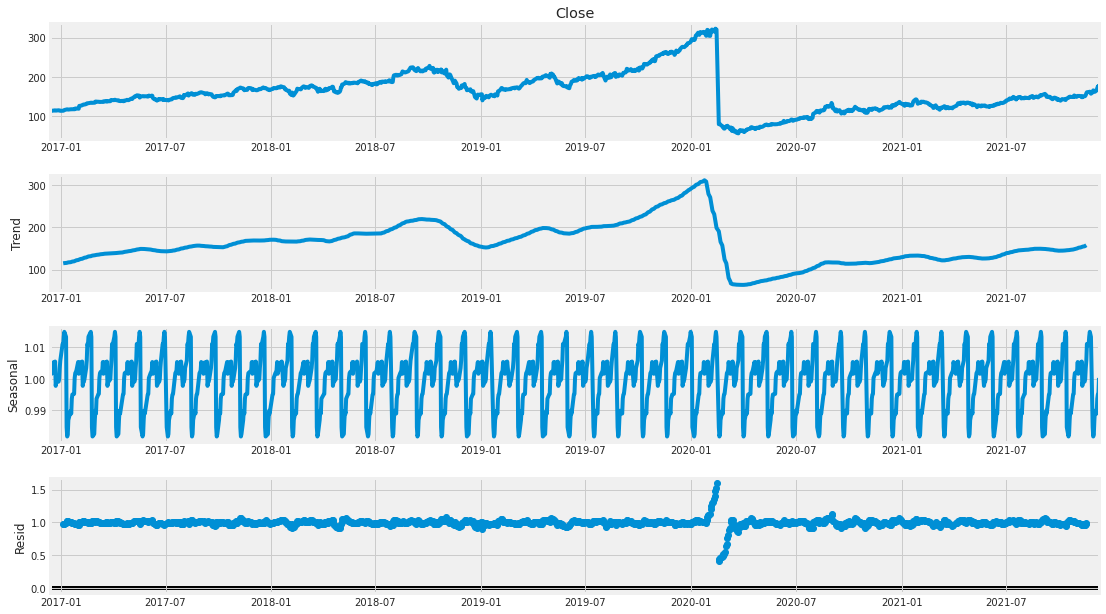

In [41]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

To reduce the magnitude of the values and the growing trend in the series, we first take a log of the series. We then calculate the rolling average of the series after obtaining the log of the series. A rolling average is computed by taking data from the previous 12 months and calculating a mean consumption value at each subsequent point in the series.

No handles with labels found to put in legend.


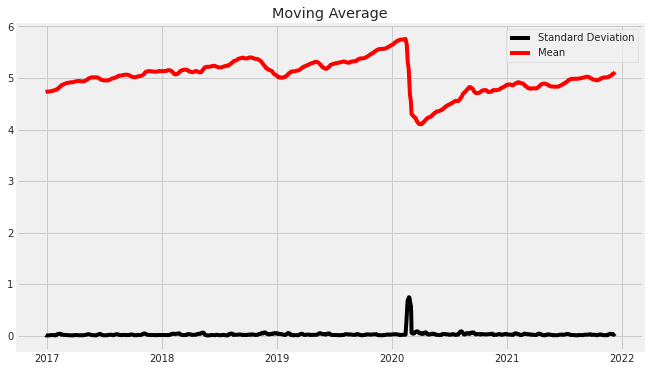

In [42]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

Now we’ll develop an ARIMA model and train it using the stock’s closing price from the train data. So, let’s visualize the data by dividing it into training and test sets.

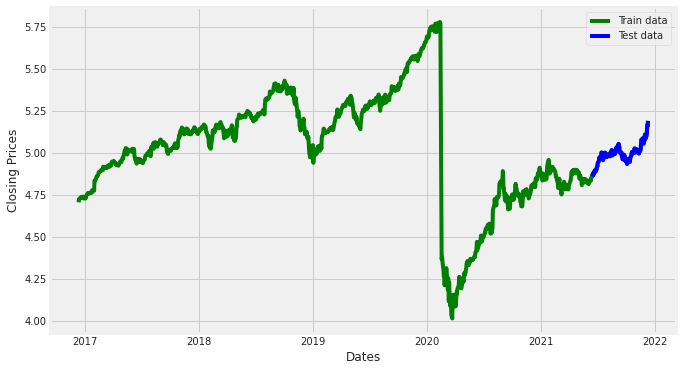

In [43]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

It’s time to choose the ARIMA model’s p,q, and d parameters. We chose the values of p,d, and q last time by looking at the ACF and PACF charts, but this time we’ll utilize Auto ARIMA to find the best parameters without looking at the ACF and PACF graphs.

Auto ARIMA: Automatically discover the optimal order for an ARIMA model.

The auto_arima function returns a fitted ARIMA model after determining the most optimal parameters for an ARIMA model. This function is based on the forecast::auto. Arima R function, which is widely used.

The auro_arima function works by performing differencing tests (e.g., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller, or Phillips–Perron) to determine the order of differencing, d, and then fitting models within start p, max p, start q, max q ranges. After conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D, auto_arima also seeks to identify the optimal P and Q hyper-parameters if the seasonal option is enabled.


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3733.390, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3732.585, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3732.547, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3735.382, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3730.926, Time=0.60 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.468 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1130
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1868.691
Date:                Sun, 12 Dec 2021   AIC                          -3735.382
Time:                        15:24:33   BIC                          -3730.353
Sample:                             0   HQIC                         -3733.482
                               - 1130                                  

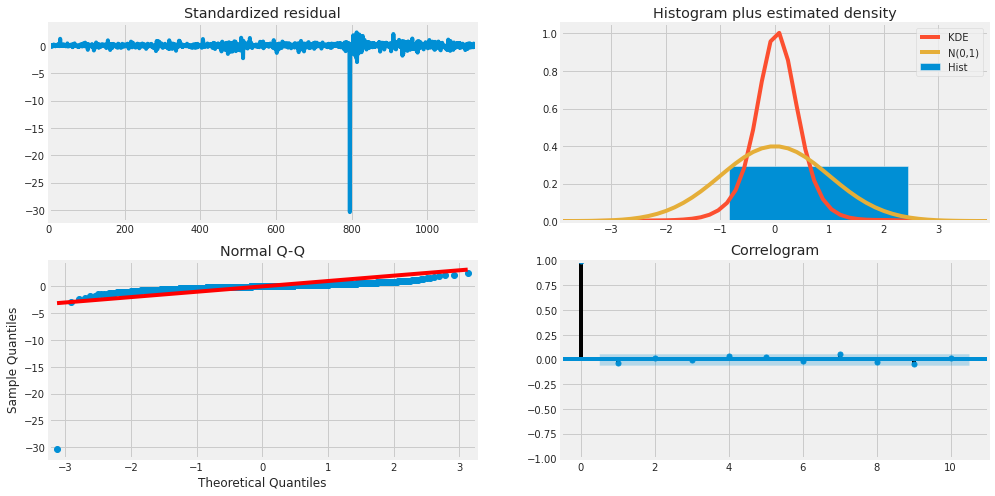

In [44]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Top left: The residual errors appear to have a uniform variance and fluctuate around a mean of zero.

Top Right: The density plot on the top right suggests a normal distribution with a mean of zero.

Bottom left: The red line should be perfectly aligned with all of the dots. Any significant deviations would indicate a skewed distribution.

Bottom Right: The residual errors are not autocorrelated, as shown by the Correlogram, also known as the ACF plot. Any autocorrelation would imply that the residual errors have a pattern that isn’t explained by the model. As a result, you’ll need to add more Xs (predictors) to the model.

As a result, the Auto ARIMA model assigned the values 1, 1, and 2 to, p, d, and q, respectively.

In [47]:
#Modeling
# Build Model
# ARIMA
model = ARIMA(train_data, order=(1,1,2))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1130
Model:                 ARIMA(1, 1, 2)   Log Likelihood                1869.650
Date:                Sun, 12 Dec 2021   AIC                          -3731.300
Time:                        15:26:59   BIC                          -3711.183
Sample:                             0   HQIC                         -3723.699
                               - 1130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5561      1.235      0.450      0.653      -1.864       2.977
ma.L1         -0.5888      1.237     -0.476      0.634      -3.014       1.836
ma.L2          0.0388      0.056      0.694      0.4

Let’s now begin forecasting stock prices on the test dataset with a 95% confidence level.



In [75]:
# Forecast
fc, se, conf = fitted.forecast(steps=3,alpha=0.05)  # 95% conf
# Make as pandas series
# conf
print(fc, se, conf )
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf, index=test_data.index)
upper_series = pd.Series(conf, index=test_data.index)

4.8676137907064945 4.868207959055647 4.868538367308271


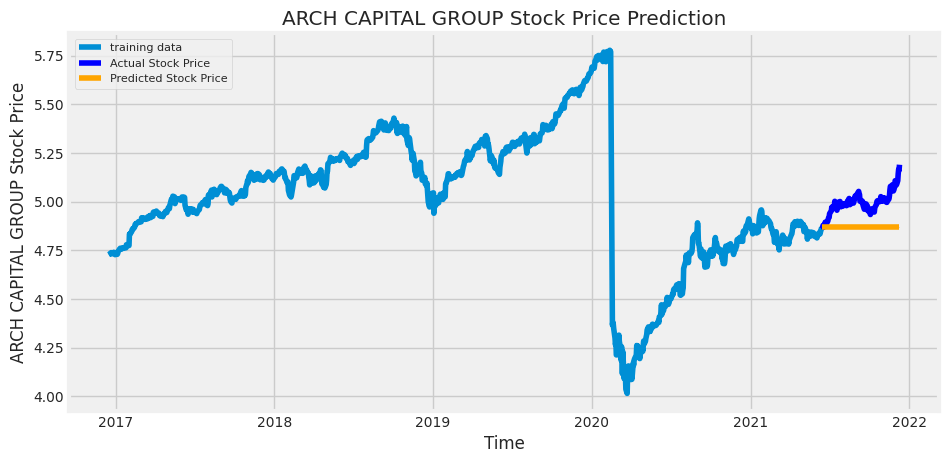

In [76]:

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [77]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

TypeError: ignored